In [1]:
# !wget https://gist.githubusercontent.com/huseinzol05/98974ae8c6c7a65d4bc0af9f5003786a/raw/2e06e71ef7349a57bc58cc9913ae6bae1f9f8447/mp.py

In [2]:
from PIL import Image
from glob import glob
import requests
import mp
import json
import os
import urllib.parse

In [3]:
!mkdir image-location
# !rm image/*.jpeg

mkdir: cannot create directory ‘image-location’: File exists


In [4]:
!wc -l locations.txt

54186 locations.txt


In [6]:
files = glob('data/generated-location/*.jsonl')
len(files)

54185

In [7]:
files[0]

'data/generated-location/47167.jsonl'

In [8]:
results = []
with open(files[0]) as fopen:
    for l in fopen:
        try:
            l = json.loads(l)
            results.append(l)
        except:
            pass
len(results)

195

In [9]:
# response = requests.get(
#     'https://www.motortrend.com/uploads/2022/03/2022-Kia-EV6-AWD-GT-Line-1.jpg',
#     cookies=cookies,
#     headers=headers,
# )
# response

In [10]:
cookies = {
    'AKA_A2': 'A',
}

headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'accept-language': 'en-MY,en;q=0.9,en-US;q=0.8,ms;q=0.7',
    'cache-control': 'max-age=0',
    # 'cookie': 'AKA_A2=A',
#     'if-modified-since': 'Thu, 11 Apr 2024 19:55:02 GMT',
#     'if-none-match': '"aac876b239c8a4ab6491582499c990f7"',
    'priority': 'u=0, i',
    'sec-ch-ua': '"Chromium";v="124", "Google Chrome";v="124", "Not-A.Brand";v="99"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'none',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36',
}

In [11]:
q = results[0]['parent_href']
url = urllib.parse.unquote(q.split('imgurl=')[1].split('&')[0])
image = Image.open(requests.get(url, stream=True, timeout = 20, cookies=cookies, headers=headers,).raw)

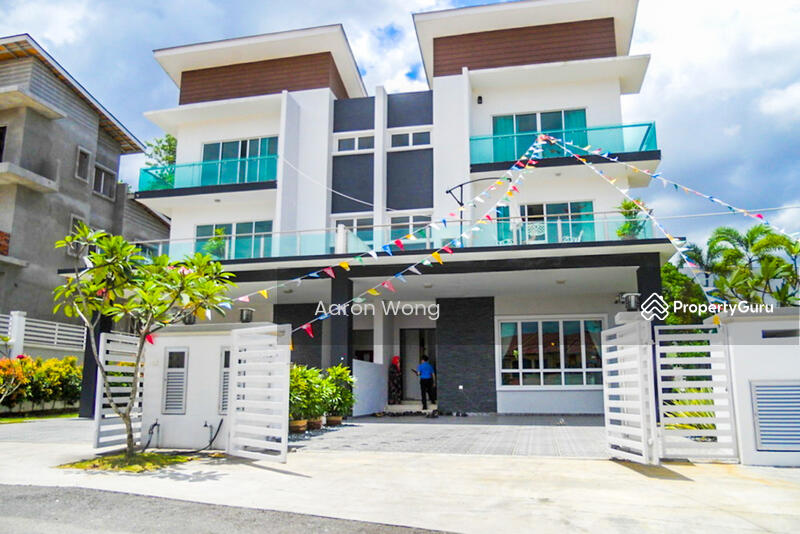

In [12]:
image

In [13]:
files[0].split('/')[-1].replace('.jsonl', '')

'47167'

In [14]:
!mkdir image-location

mkdir: cannot create directory ‘image-location’: File exists


In [15]:
from tqdm import tqdm

def loop(files):
    files, _ = files
    for file in tqdm(files):
        index = file.split('/')[-1].replace('.jsonl', '')
        with open(file) as fopen:
            i = 0
            for l in fopen:
                try:
                    l = json.loads(l)
                except:
                    i += 1
                    continue
                filename = os.path.join('image-location', f'{index}-{i}.jpeg')
                if os.path.exists(filename):
                    i += 1
                    continue
                    
                try:
                    q = l['parent_href']
                    url = urllib.parse.unquote(q.split('imgurl=')[1].split('&')[0])
                    image = Image.open(requests.get(url, stream=True, timeout = 20, cookies=cookies, headers=headers).raw)

                    image.save(filename)
                except Exception as e:
                    pass
                
                i += 1

In [16]:
mp.multiprocessing(files, loop, cores = 50, returned = False)

 94%|█████████▍| 1019/1083 [9:24:20<40:11, 37.68s/it]]  /home/ubuntu/.local/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
 98%|█████████▊| 1057/1083 [10:06:25<30:00, 69.26s/it]it]/home/ubuntu/.local/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
 99%|█████████▉| 1075/1083 [11:34:12<08:45, 65.64s/it]]/home/ubuntu/.local/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 1083/1083 [14:45:13<00:00, 49.04s/it]   


In [18]:
!du -hs image-location

447G	image-location
